# **Processamento de Linguagem Natural [2024-Q2]**
Prof. Alexandre Donizeti Alves

### **PROJETO PRÁTICO** [LangChain + Grandes Modelos de Linguagem + API]


O **PROJETO PRÁTICO** feito é um estudo sobre o uso de LLM's para ajudar professores a criarem e corrigirem provas. Ele está dividido em duas seções: a primeira é feita uma prova de exemplo e a segunda é feita a correção de uma prova (essa podendo ser feita tanto de questões dissertativas ou questões de múltipla escolha).


### **EQUIPE**

---

**POR FAVOR, PREENCHER OS INTEGRANDES DA SUA EQUIPE:**


**Integrante 01:**

João Pedro Sousa Bianchim  R.A: 11201920729

**Integrante 02:**

Daniel Mendes Vale de Sá R.A.: 11201921422

**Integrante 03:**

Daniel Medici Martins R.A: 11202021642

### **GRANDE MODELO DE LINGUAGEM (*Large Language Model - LLM*)**

---


**LLM**: gpt-4o (OpenAI)

>

https://platform.openai.com/docs/api-reference/introduction



### **API**
---

Por favor, informe os dados da API selecionada:

**API**: Não se aplica (Acordado antes com o professor)

**Texto Base para Elaboração das Perguntas**: https://www.ebooksbrasil.org/adobeebook/peixoto.pdf






### **DESCRIÇÃO**
---

A ideia do projeto é implementar um `notebook` no `Google Colab` que faça uso do framework **`LangChain`** (obrigatório) e de um **LLM** aplicando, no mínimo, DUAS técnicas de PLN.

O **LLM** e a **API** selecionados devem ser informados na seguinte planilha:

> https://docs.google.com/spreadsheets/d/1iIUZcwnywO7RuF6VEJ8Rx9NDT1cwteyvsnkhYr0NWtU/edit?usp=sharing


As seguintes técnicas de PLN foram usadas:

*   Sumarização de Textos
*   Sistemas de Perguntas e Respostas


## **Criação de Provas**


#### **Ideia Principal**

A ideia aqui é permitir ao professor enviar um pdf contendo os conteúdos que ele deseja que caia na prova, para a partir daí o programa ser capaz de gerar questões condizentes com o conteúdo desejado. O programa é capaz de gerar provas dissertativas ou provas de múltipla escolha.

#### **Como foi feito**

Para a elaboração da prova, decidiu-se usar uma abordagem de RAG. Permitindo no caso que o professor que fosse usar a ferramenta pudesse enviar arquivos grandes.

Para isso utilizou-se a ferramenta PyPDF loader, que permite ao programa ler e interpretar PDF's.

In [ ]:
!pip install -qU langchain langchain-community langchain langchain-openai langchain_chroma

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 1.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 45.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 3.6 MB/s eta 0:00:00
 

In [ ]:
!pip install -qU pypdf fpdf

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.8/295.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
import getpass
import os

os.environ["OPENAI_API_KEY"] = getpass.getpass()

··········


Para o exemplo, temos um livro presente no url:
> https://www.ebooksbrasil.org/adobeebook/peixoto.pdf

Que conta a história do Brasil. No caso, pegamos apenas 7 páginas do livro para agilizar na hora de testes e economizar no uso do modelo.

In [ ]:
import requests

url = 'https://www.ebooksbrasil.org/adobeebook/peixoto.pdf'

local_filename = 'peixoto.pdf'

response = requests.get(url, stream=True)

if response.status_code == 200:
    with open(local_filename, 'wb') as file:
        for chunk in response.iter_content(chunk_size=8192):
            file.write(chunk)
    print(f'Arquivo PDF salvo como {local_filename}')
else:
    print(f'Falha ao baixar o arquivo. Status code: {response.status_code}')

Arquivo PDF salvo como peixoto.pdf


In [ ]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "/content/peixoto.pdf"
loader = PyPDFLoader(file_path)

docs = loader.load()

print(len(docs))

267


In [ ]:
from langchain_community.document_loaders import PyPDFLoader

file_path = "/content/peixoto.pdf"
loader = PyPDFLoader(file_path)

all_docs = loader.load()

page_numbers = [193, 201]
docs = [all_docs[i] for i in page_numbers if i > 0 and i <= len(all_docs)]

print(len(docs))

2


In [ ]:
print(docs[0].page_content)

rainha Dona Luíza de Gusmão, se preciso fosse, em carta 
achada em gaveta secreta, marcada com três cruzes, como 
imperativo conselho, testemunha Vieira(1). D. Luís da Cunha 
diz que o bisavô D. Pedro da Cunha dera a D. Antônio Prior do 
Crato, na incapacidade de disputar o reino a Filipe II passasse a 
ser Rei de Portugal no Brasil “cuja vastidão e riquezas erão as 
que naquele tempo se sabião”(2) e ele próprio sugeriu-o a Dom 
João V: “S. M. se acha em idade de ver florentíssimo e bem 
povoado aquele imenso continente do Brasil; se nele, tomando o 
título de Imperador do Ocidente, quisesse estabelecer a sua 
Corte, levando consigo...” Quando Espanha invade Portugal, 
sob Dom José, por causa do “Pacto de Família”, Pombal 
prepara armada para a Família Real e a Corte virem ter ao
Brasil. É o que realiza Dom João VI, combinado por acordo 
com Inglaterra, em 22 de Outubro de 1807, ratificado em 
Lisboa a 8 de Novembro do mesmo ano(3). O rei de Portugal 
não seria prisioneiro, e à discriç

In [ ]:
from langchain_openai import ChatOpenAI

modelo = ChatOpenAI(model="gpt-4o-mini")

In [ ]:
from langchain_chroma import Chroma
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=200)
splits = text_splitter.split_documents(docs)
vectorstore = Chroma.from_documents(documents=splits, embedding=OpenAIEmbeddings())

retriever = vectorstore.as_retriever()

Para dar mais variação, é dada duas opções, a elaboração de uma prova dissertativa e a elaboração de uma prova de alternativas. Cada uma com um prompt diferente para guiar o modelo.

A seguir vê-se como isso foi feito:

In [ ]:
from langchain.chains import create_retrieval_chain
from langchain.chains.combine_documents import create_stuff_documents_chain
from langchain_core.prompts import ChatPromptTemplate
opcao = input("Digite a opção desejada (alternativa a ou dissertativa d): " )
if opcao == "a":
  system_prompt = (
    "Voce é um professor especializado em criar questões para avaliar seus alunos. "
    "Use o conteudo a seguir como sua base de informacoes para a criacao da pergunta"
    "as perguntas devem ser criadas de com base no conteudo apresentado "
    "suas pergunta devem ser no máximo duas linhas "
    "as pergunta devem ser de multipla escolha onde apenas uma alternativa das {numero} apresentada deve ser a resposta correta"
    "escreva APENAS as questões, indices e sua alternativa correta"
    "\n\n"
    "{context}"
  )
elif opcao == "d":
  system_prompt =(
    "Voce é um professor especializado em criar questões para avaliar seus alunos. "
    "Use o conteudo a seguir como sua base de informacoes para a criacao da pergunta"
    "as perguntas devem ser criadas de com base no conteudo apresentado "
    "as pergunta devem ser dissertativas e vir acompanhadas de respostas certas ideais"
    "escreva APENAS as questões, indices e sua resposta ideal"
    "\n\n"
    "{context}"
  )
else:
  print("Opção inválida")
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("human", "{input}"),
    ]
)

question_answer_chain = create_stuff_documents_chain(modelo, prompt)

rag_chain = create_retrieval_chain(retriever, question_answer_chain)


Digite a opção desejada (alternativa a ou dissertativa d): a


Também permitimos ao professor escolher quantas perguntas seriam geradas:

In [ ]:
numero_questoes = input("Quantas questoes voce deseja criar?")

if opcao == "a":
  numero=input("Quantas opções por pergunta?")
  resposta = rag_chain.invoke({"input": f"quero apenas {numero_questoes} questoes", "numero": 5})
elif opcao == "d":
  resposta = rag_chain.invoke({"input": f"quero apenas {numero_questoes} questoes"})

# resposta = rag_chain.invoke({"input": f"quero apenas {usuario} questoes"})

Quantas questoes voce deseja criar?4
Quantas opções por pergunta?4


A seguir a prova feita é salva como  um arquivo PDF, facilitando a visualização e utilização pelo professor

In [ ]:
from fpdf import FPDF

# Função para gerar PDF
def gerar_pdf(texto, nome_arquivo="prova.pdf"):
    pdf = FPDF()
    pdf.add_page()
    pdf.set_font("Arial", size=12)

    # Quebrar o texto em várias linhas, se necessário
    linhas = texto.split('\n')
    for linha in linhas:
        pdf.multi_cell(0, 10, txt=linha)

    pdf.output(nome_arquivo)
    return nome_arquivo


resposta_texto = resposta.get("answer", "Resposta não encontrada.")  # Verifique a chave correta se necessário

# Gerar o PDF com a resposta
arquivo_pdf = gerar_pdf(resposta_texto)
print(f"Arquivo PDF gerado: {arquivo_pdf}")


Arquivo PDF gerado: prova.pdf


##### Exemplo de PDF gerado pelo modelo, baseado no livro citado anteriormente:

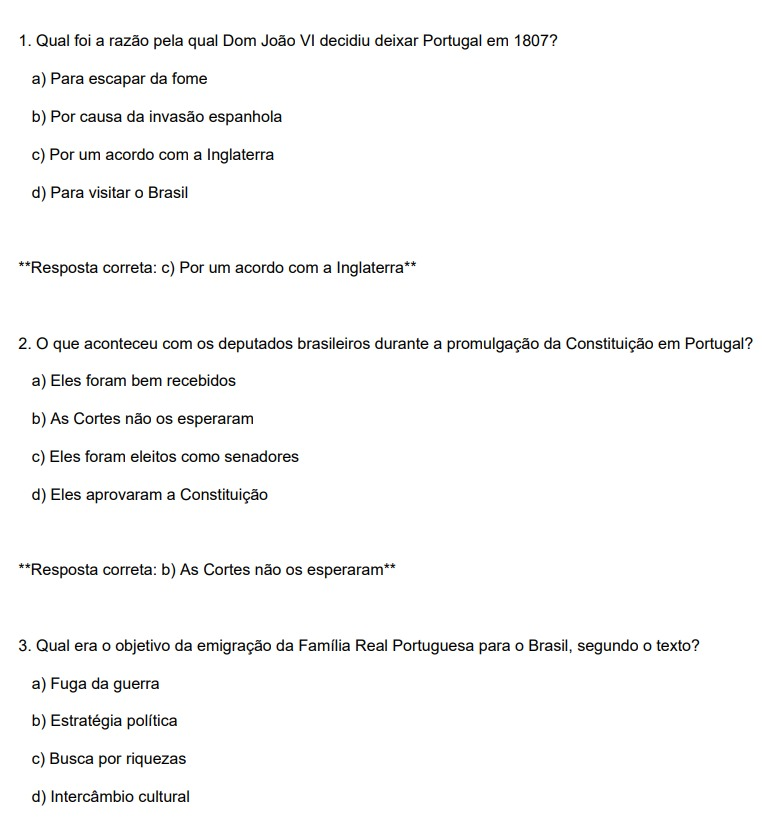

## **Correção de provas**

### **Ideia principal**

A intenção foi fazer o trecho de correção de provas independete da geração de provas, ou seja, tornar possível corrigir uma prova que não necessariamente foi gerada pelo LLM.

### **Como foi feito**

O funcionamento é simples: É realizado o upload de uma imagem contendo a prova (questões + respostas) para o modelo. A leitura da imagem é feita, identificando-se as perguntas, inicialmente. Caso a prova contenha questões objetivas, pede-se para que o usuário informe o gabarito para o modelo. Por fim, o modelo compara o gabarito com as respostas dadas pelo aluno e fornece sua nota.

In [ ]:
!pip install langchain langchain_openai

In [ ]:
from langchain_core.pydantic_v1 import BaseModel, Field
from typing import Optional , Any
import base64
from langchain.chains import TransformChain
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.exceptions import OutputParserException

Aqui são especificados os tipos de informação que serão extraídos da imagem.

In [ ]:
class ImageInformation(BaseModel):
    respostas: str = Field(
        ...,
        example="[1: a, 2: d]",
        description="Informe quais alternativas o aluno assinalou para cada uma das questões objetivas da prova",
    )
    alternativas: str = Field(
        ...,
        example="[1: correta, 2: incorreta, 3: correta]",
        description="Compare as alternativas assinaladas pelo aluno SOMENTE com o gabarito fornecido e informe, para cada uma das questões, se ela está correta ou incorreta",
    )
    gabarito: str = Field(
        ...,
        example="[1: a, 2: b, 3: b]",
        description="qual o gabarito que voce utilizou para corrigir as provas, utilizar SOMENTE o gabarito fornecido a você",
    )
    dissertativa: Optional[str] = Field(
        ...,
        example="[1: Meio certo, 2: Certo]",
        description="o aluno acertou as questão dissertativas ? Apenas 'errado', 'certo' e 'meio-certo' deverão ser dadas para CADA questão, NAO utilizar em questoes alternativas",
    )
    Nome: str = Field(
        ...,
        example="Cristiano Ronaldo",
        description="o Nome do aluno, colocar 'aluno' se nao identificado",
    )
    RA: int = Field(
        ...,
        example=11202021642,
        description="o RA do aluno, colocar '----' se nao identificado",
    )


A imagem é preparada para upload (precisa estar nos diretórios), transformando-a em Base64.

In [ ]:
test_image = "download.jpg"

def load_image(inputs: dict) -> dict:
    image_path = inputs[test_image]

    def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode("utf-8")

    image_base64 = encode_image(image_path)
    return {"image": image_base64}

### Exemplos


Caso queira testar, recomenda-se baixar essas imagens que contém exemplo de uma prova preenchida por um aluno.

Exemplo 1: Prova de questões objetivas, já assinalada.

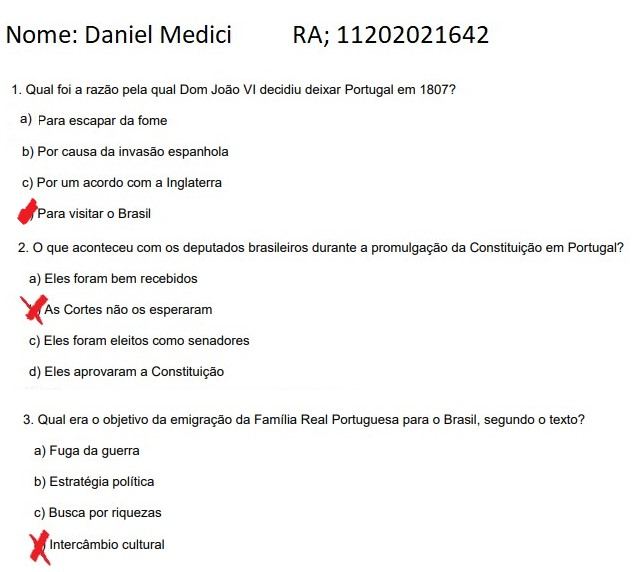

Exemplo 2 Prova com questões dissertativas, já com as respostas.

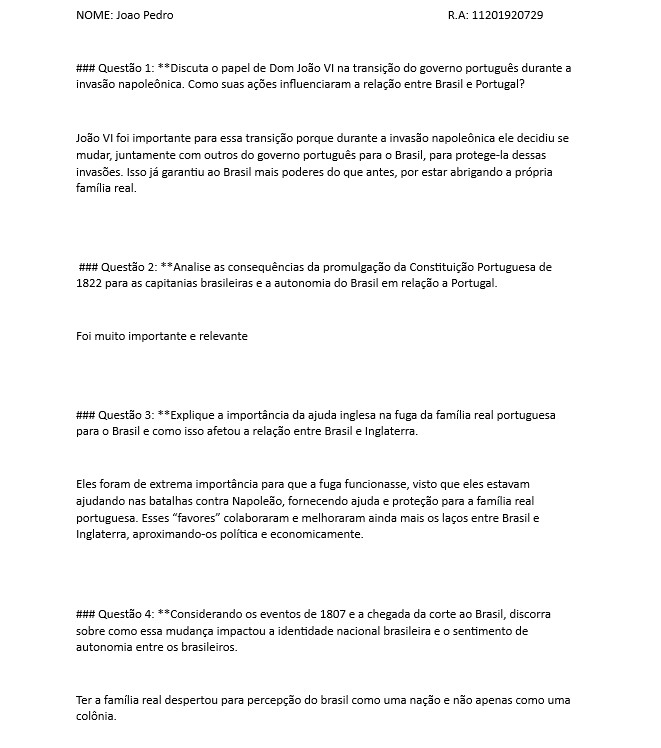

### Continuação implementação

Cria-se o Chain responsável pelo processo completo de correção da prova.

In [ ]:
load_image_chain = TransformChain(
    input_variables=[test_image], output_variables=["image"], transform=load_image
)

In [ ]:
def image_model(inputs: dict) -> str | list[str | dict[Any, Any]]:
    model: ChatOpenAI = ChatOpenAI(
        temperature=0,
        model="gpt-4o",
        max_tokens=1024,
    )
    msg = model.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": inputs["prompt"]},
                    {"type": "text", "text": parser.get_format_instructions()},
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{inputs['image']}"
                        },
                    },
                ]
            )
        ]
    )
    return msg.content

Aqui é informado o gabarito da prova e finalmente enviado o prompt para o modelo.

In [ ]:
parser = JsonOutputParser(pydantic_object=ImageInformation)
gabarito = input("Digite o gabarito da prova (caso seja multipla alternativa, senão apertar enter): ")
print(gabarito)
def get_image_information(image_path: str) -> dict:
    vision_prompt = f"""Voce é um professor especializado em corrigir questões para avaliar seus alunos.\n
    - As questoes devem ser avaliadas de com base no conteudo apresentado
    - As perguntas dissertativas devem ser avaliadas certas , erradas ou meio certas
    - As perguntas alternativas devem ser avaliadas certas ou erradas SEGUINDO ESTRITAMENTE o gabarito a seguir:\n
    - GABARITO : {gabarito}\n
    Voce deve identificar a quem pertence essa prova, armazenando seu nome e RA apenas se houverem, não crie nomes ou RA. Em seguida faça a leitura das alternativas marcadas pelo aluno e detalhe os acertos e erros.
    """
    vision_chain = load_image_chain | image_model | parser
    return vision_chain.invoke(
            {test_image: f"{image_path}", "prompt": vision_prompt}
        )

KeyboardInterrupt: Interrupted by user

Resultado da correção

In [ ]:
resposta = get_image_information(test_image)
print(resposta)

{'respostas': '[1: d, 2: b, 3: d]', 'alternativas': '[1: correta, 2: correta, 3: correta]', 'gabarito': '[1: d, 2: b, 3: d]', 'dissertativa': '[]', 'Nome': 'Daniel Medici', 'RA': 11202021642}


Exemplo de Output de Correção:

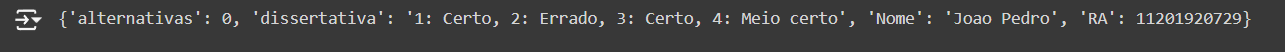

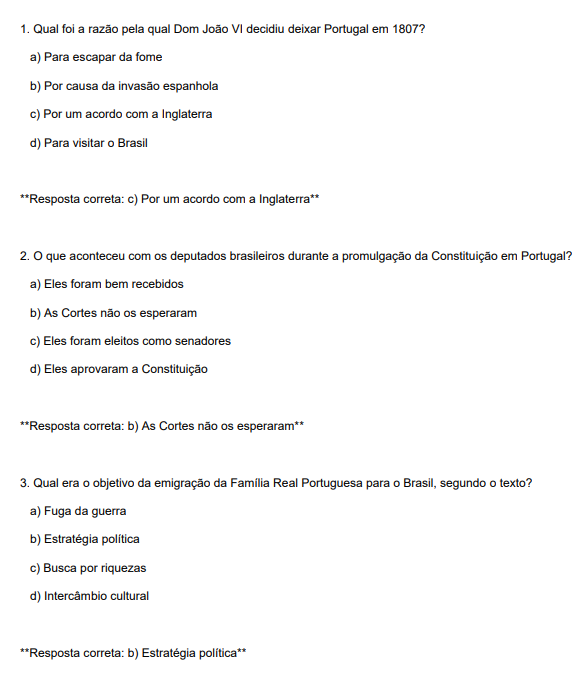

TESTE


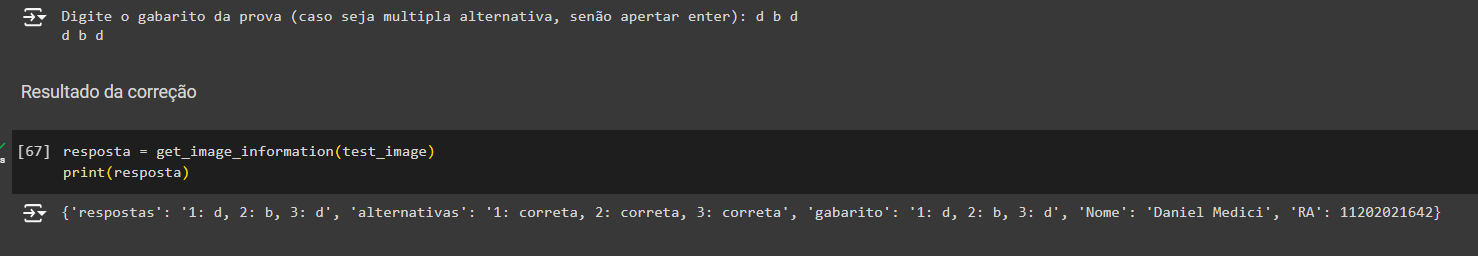